In [13]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('star_classification.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
data.head()
train_df = data.drop(['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'fiber_ID'], axis=1)

<Axes: >

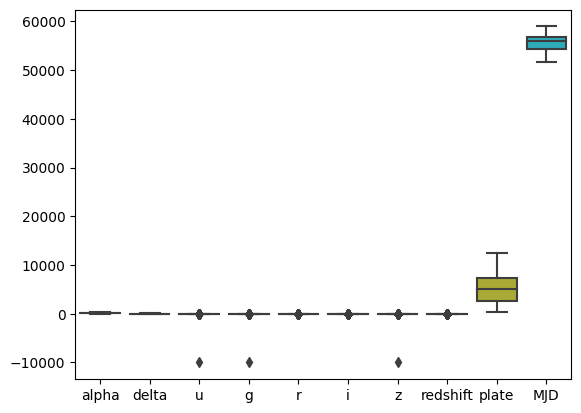

In [7]:
sns.boxplot(data=train_df)

In [8]:
train_df.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift', 'plate',
       'MJD'],
      dtype='object')

In [56]:

def main(data, path):
    fields = [
        "petroMag_i",
        "absMagI",
        "h_alpha_flux",
        "oiii_5007_flux",
        "nii_6584_flux",
        "lgm_tot_p50",
        "sfr_tot_p50",
    ]
    yranges = [
        None,
        None,
        (-500, 3500),
        (-100, 500),
        (-0.1, 0.1),
        (-2000, 1000),
        (-2000, 1000),
    ]
    l_fields = len(fields)
    for i in range(l_fields):
        for j in range(i + 1, l_fields):
            step3.plot(data, fields[j], path, yranges[j], False, fields[i])

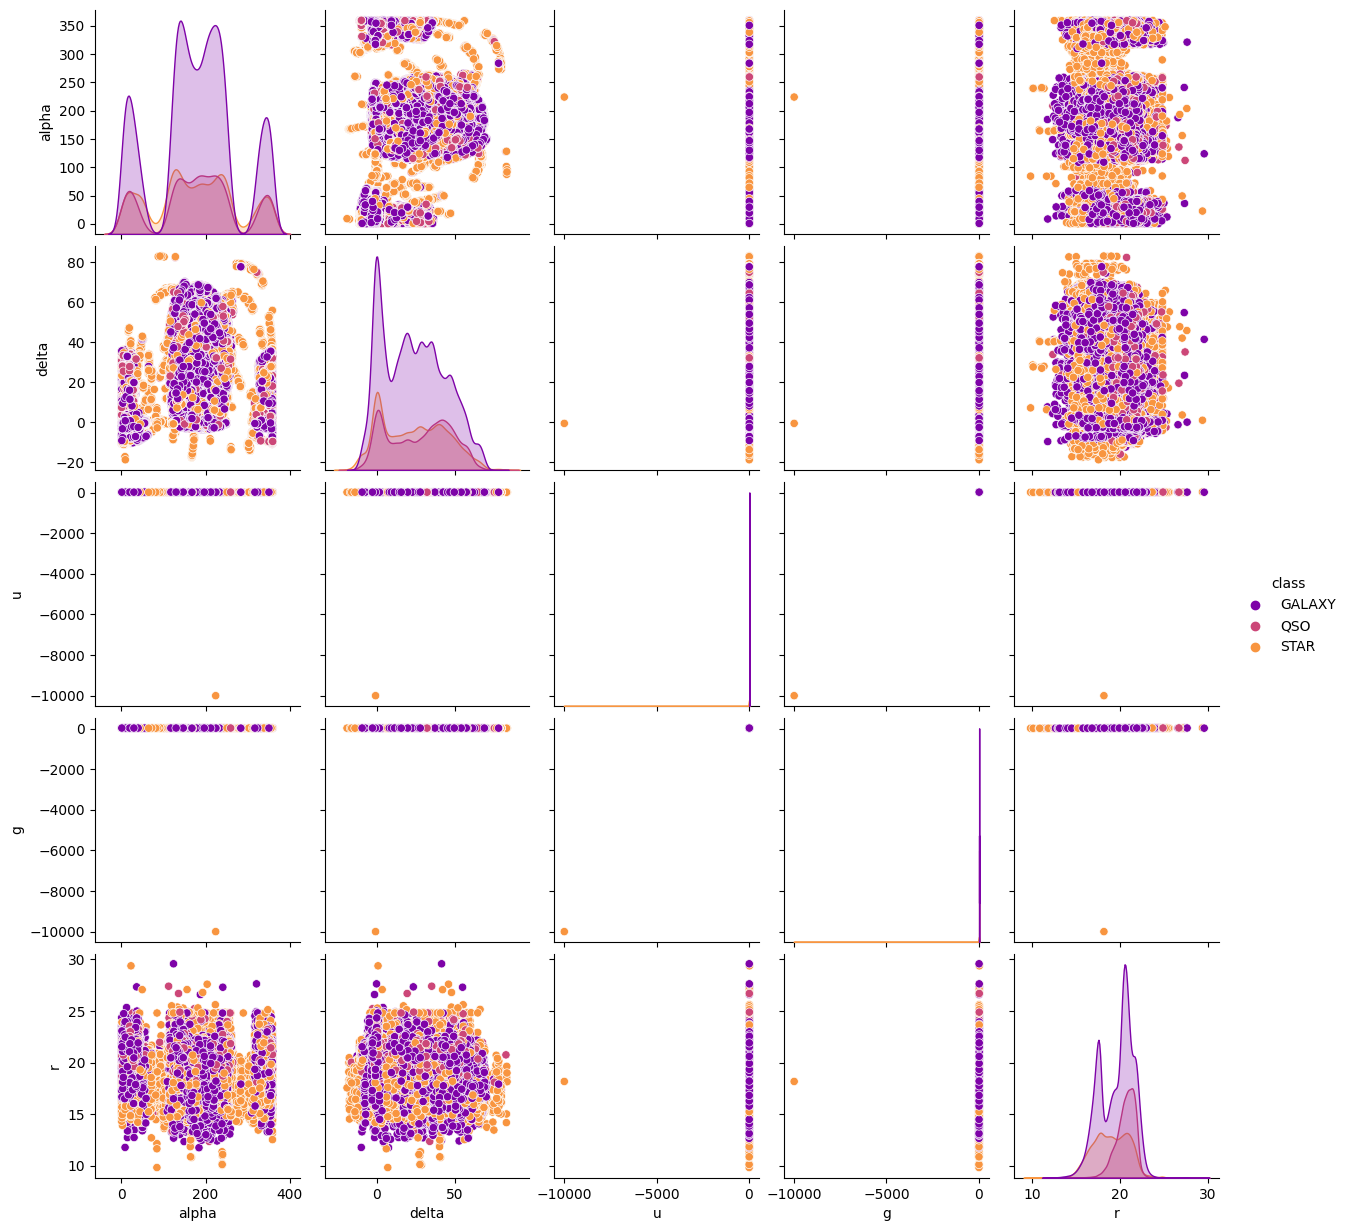

In [9]:
sns.pairplot(data=train_df[['alpha', 'delta', 'u', 'g', 'r', 'class']], hue='class', palette='plasma')

In [51]:
def read_catalog(filename):
    from astropy.io import fits

    hdulist = fits.open(filename)
    data = hdulist[1].data
    hdulist.close()
    return data


def filter_catalog(catalog, id):
    return catalog[catalog["ID"] == id]

In [52]:
resolution = 9999


def main(data, path):
    plot(data, "z", path, (-0.007, 0.11), std_mod=False)
    plot(data, "petroMag_u", path, (13, 30))
    plot(data, "petroMag_r", path)
    plot(data, "petroMag_i", path)
    plot(data, "petroMag_z", path)
    plot(data, "h_alpha_flux", path, (-500, 500), 100)
    plot(data, "h_beta_flux", path, (-0.02, 0.02), 100)
    plot(data, "oiii_5007_flux", path, (-100, 500), 100)
    plot(data, "nii_6584_flux", path, (-0.1, 0.1), 100)
    plot(data, "lgm_tot_p50", path, (0, 20), 100)
    plot(data, "sfr_tot_p50", path, (-5, 5), 100)
    plot(data, "absMagU", path)
    plot(data, "absMagG", path)
    plot(data, "absMagR", path)
    plot(data, "absMagI", path)
    plot(data, "absMagZ", path)


def middles(bins):
    res = []
    bin_index = 0
    while bin_index < len(bins) - 1:
        res.append((bins[bin_index] + bins[bin_index + 1]) / 2)
        bin_index += 1
    return res


def plot(
    data,
    field,
    path,
    range=None,
    bin="auto",
    std_mod=True,
    filename=None,
    title=None,
    x=None,
    residuals=True,
):
    import math, matplotlib.pyplot as plt, numpy as np, os, scipy.stats as stats, warnings
    from scipy.stats import sem as scipy_sem, median_abs_deviation as scipy_mad

    if filename is None:
        filename = field
    if title is None:
        title = field
    if x is None:
        x = data[field][np.isfinite(data[field])]
    if range is not None:
        x = x[np.logical_and(x > range[0], x < range[1])]
    filepath = path + "/" + filename + ".png"
    filepath2 = path + "/" + filename + "-residuals.png"
    print(filepath)
    print("\tPlot histogram")
    count, bins, _ = plt.hist(x, bin, range, density=True, color="green", label=field)
    plt.xlabel(field)
    plt.ylabel("relative frequency")
    plt.title(title)
    mean = x.mean() if std_mod else sum(x) / x.size
    print("\tCompute mean", mean)
    warnings.filterwarnings("ignore")
    sem = (
        scipy_sem(x)
        if std_mod
        else math.sqrt(sum((x - np.full(x.size, mean)) ** 2)) / x.size
    )
    warnings.resetwarnings()
    print("\tCompute sem", sem)
    print("\tPlot mean ± sem")
    plt.axvline(mean, color="red", label="mean ± sem")
    plt.axvspan(mean - sem, mean + sem, alpha=0.25, color="red")
    median = np.median(x)
    print("\tCompute median", median)
    mad = scipy_mad(x)
    print("\tCompute mad", mad)
    print("\tPlot median ± mad")
    plt.axvline(median, color="blue", label="median ± mad")
    plt.axvspan(median - mad, median + mad, alpha=0.25, color="blue")
    plt.legend()
    os.makedirs(path, exist_ok=True)
    plt.savefig(filepath)
    std = x.std()
    plt.cla()
    if residuals:
        print("\tCompute std", std)
        if range is None:
            range = bins[0], bins[-1]
        linspace = np.linspace(range[0], range[1], resolution)
        warnings.filterwarnings("ignore")
        plt.plot(
            linspace,
            stats.norm.pdf(linspace, loc=mean, scale=std),
            color="brown",
            label="estimated values",
        )
        warnings.resetwarnings()
        plt.title(title + " (residuals)")
        plt.legend()
        plt.xlabel(field)
        plt.ylabel("relative frequency")
        plt.scatter(middles(bins), count, s=20, c="orange", label="observed values")
        plt.savefig(filepath2)
    plt.cla()

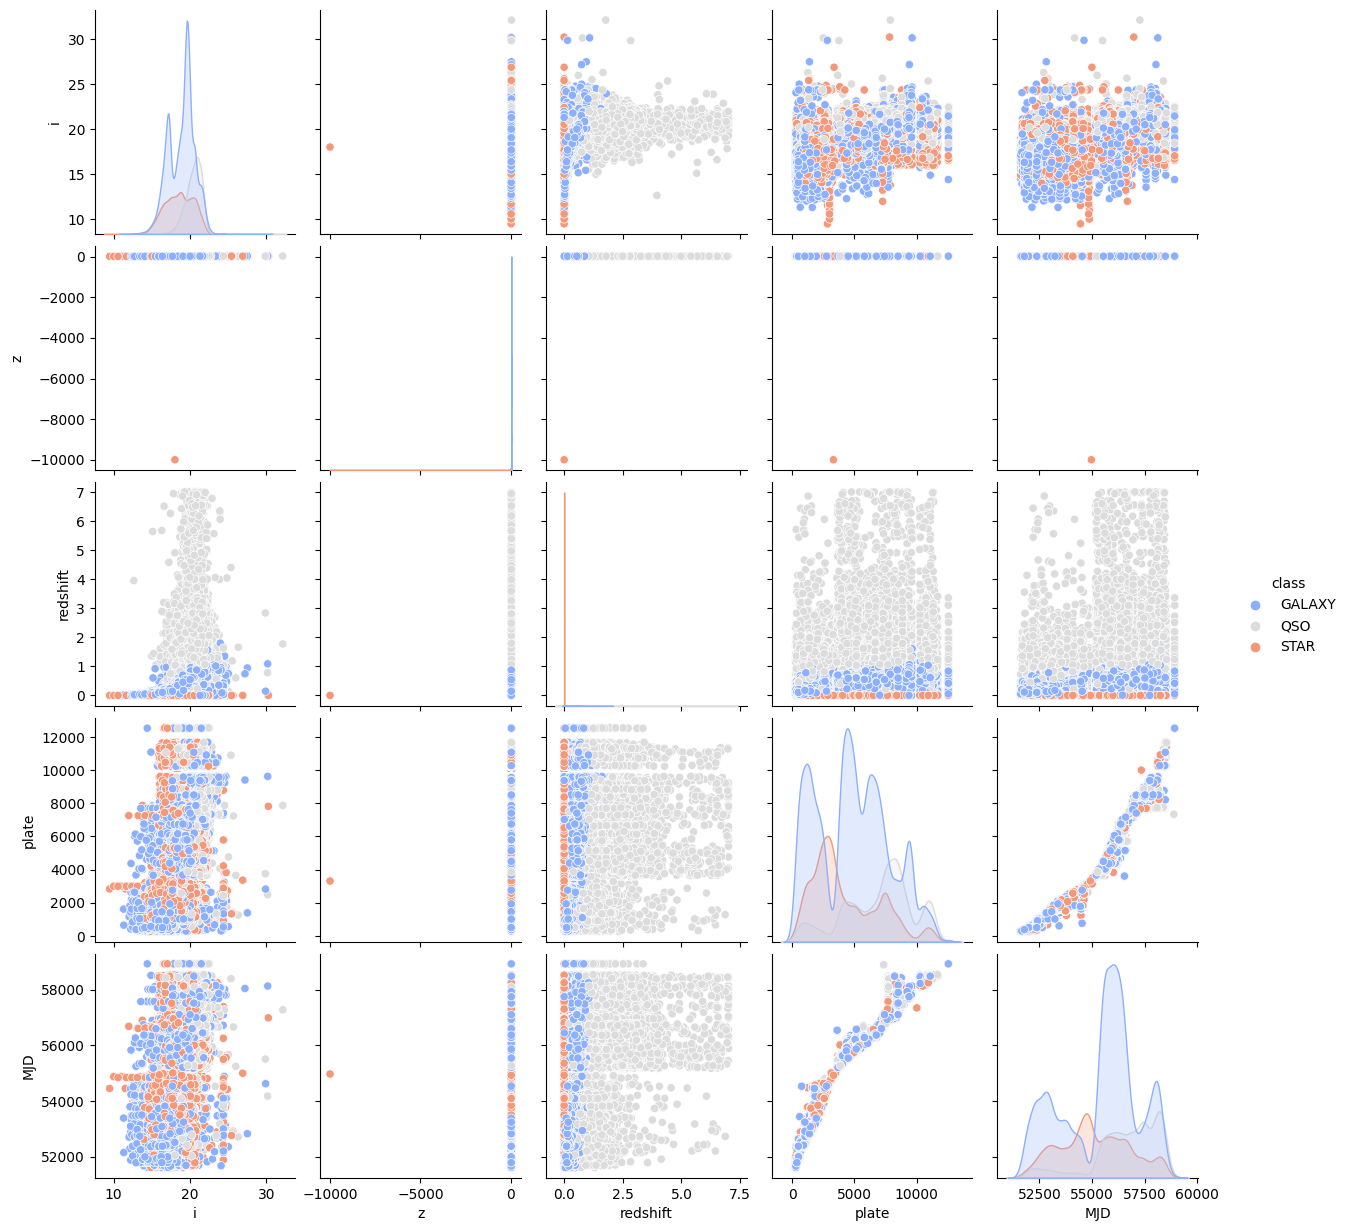

In [10]:
sns.pairplot(data=train_df[['i', 'z', 'redshift', 'plate', 'MJD', 'class']], hue='class', palette='coolwarm')

In [54]:
import numpy as np

resolution = 9999


def theoretical_relation_BPT(x):
    return 0.61 / (x - 0.005) + 1.3


def theoretical_relation_CM(x):
    return -0.495 + 0.25 * x


def theoretical_relation_SFRm(x):
    return -8.64 + 0.76 * x


def is_over_theoretical_relation(x, y, theoretical_relation, range=(np.NINF, np.PINF)):
    range = np.full(x.size, range[0]), np.full(x.size, range[1])
    return np.logical_or(
        np.logical_or(x < range[0], x > range[1]), y >= theoretical_relation(x)
    )


def main(data, path):
    # BPT
    data_BPT = data[
        np.logical_and(
            np.logical_and(np.isfinite(data["z"]), data["h_alpha_flux"] != 0),
            data["h_beta_flux"] != 0,
        )
    ]
    x = data_BPT["nii_6584_flux"] / data_BPT["h_alpha_flux"]
    y = data_BPT["oiii_5007_flux"] / data_BPT["h_beta_flux"]
    z = data_BPT["z"][np.logical_and(x > 0, y > 0)]
    xx = np.log10(x[np.logical_and(x > 0, y > 0)])
    yy = np.log10(y[np.logical_and(x > 0, y > 0)])
    plot(
        xx,
        yy,
        z,
        "BPT",
        "log([NII] / Hα)",
        "log([OIII] / Hβ)",
        theoretical_relation_BPT,
        (-9, -0.078),
        path,
    )
    # color-mass
    data_CM = data[np.logical_and(np.isfinite(data["z"]), data["lgm_tot_p50"] > -2000)]
    x = data_CM["lgm_tot_p50"]
    y = data_CM["absMagU"] - data_CM["absMagR"]
    z = data_CM["z"]
    plot(
        x,
        y,
        z,
        "color-mass",
        "log10(M / M_⊙)",
        "u - r (color)",
        theoretical_relation_CM,
        (x.min() - 1, x.max() + 1),
        path,
    )
    # SFR-mass
    data_SFRm = data[
        np.logical_and(
            np.logical_and(np.isfinite(data["z"]), data["lgm_tot_p50"] > -2000),
            data["sfr_tot_p50"] > -2000,
        )
    ]
    x = data_SFRm["lgm_tot_p50"]
    y = data_SFRm["sfr_tot_p50"]
    z = data_SFRm["z"]
    plot(
        x,
        y,
        z,
        "SFR-mass",
        "log10(M / M_⊙)",
        "SFR",
        theoretical_relation_SFRm,
        (x.min() - 1, x.max() + 1),
        path,
    )


def plot(x, y, z, name, xlabel, ylabel, theoretical_relation, domain, path):
    import matplotlib.pyplot as plt, os
    from . import step2

    filepath = path + "/" + name + ".png"

    print(filepath)

    plt.colorbar(
        plt.scatter(x, y, c=z, cmap="plasma", alpha=0.3, vmin=z.min(), vmax=z.max())
    )
    linspace = np.linspace(domain[0], domain[1], resolution)
    plt.plot(
        linspace,
        theoretical_relation(linspace),
        color="red",
        label="theoretical relation",
    )
    plt.title(name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    os.makedirs(path, exist_ok=True)
    plt.savefig(filepath)
    plt.clf()
    filter = is_over_theoretical_relation(x, y, theoretical_relation, range=domain)
    inverse_filter = np.logical_not(filter)
    step2.plot(
        None,
        xlabel,
        path,
        filename=name + "-x-up",
        title=xlabel + " (above the " + name + " theoretical relation)",
        x=x[filter],
        residuals=False,
    )
    step2.plot(
        None,
        xlabel,
        path,
        filename=name + "-x-down",
        title=xlabel + " (below the " + name + " theoretical relation)",
        x=x[inverse_filter],
        residuals=False,
    )
    step2.plot(
        None,
        ylabel,
        path,
        filename=name + "-y-up",
        title=ylabel + " (above the " + name + " theoretical relation)",
        x=y[filter],
        residuals=False,
    )
    step2.plot(
        None,
        ylabel,
        path,
        filename=name + "-y-down",
        title=ylabel + " (below the " + name + " theoretical relation)",
        x=y[inverse_filter],
        residuals=False,
    )

In [55]:
nbins = 10
nbins2 = 5
resolution = 9999


def main(data, path):
    plot(data, "lgm_tot_p50", path, (-2000, 1000))


def plot(data, field, path, yrange=None):
    import matplotlib.pyplot as plt, numpy as np, os
    from scipy.interpolate import interp1d

    filepath = path + "/" + field + "-scatter.png"
    filepath2 = path + "/" + field + "-histogram.png"

    print(filepath)
    if yrange is not None:
        data = data[np.logical_and(data[field] > yrange[0], data[field] < yrange[1])]
    # Data
    x = data["z"][np.logical_and(np.isfinite(data["z"]), np.isfinite(data[field]))]
    y = data[field][np.logical_and(np.isfinite(data["z"]), np.isfinite(data[field]))]
    print("\tPlot " + field + "-redshift")
    plt.xlabel("redshift")
    plt.ylabel(field)
    plt.scatter(x, y, alpha=0.1, label="data")
    # Means
    bins = np.linspace(x.min(), x.max(), nbins)
    means_x = []
    means_y = []
    err_y = [[], []]
    for i in range(nbins - 1):
        means_x.append((bins[i] + bins[i + 1]) / 2)
        ys = y[np.logical_and(bins[i] <= x, x < bins[i + 1])]
        mean = ys.mean()
        means_y.append(mean)
        err_y[0].append(mean - np.percentile(ys, 16))
        err_y[1].append(np.percentile(ys, 84) - mean)
    interpolation = interp1d(means_x, means_y, "cubic")
    linspace = np.linspace(means_x[0], means_x[-1], resolution)
    plt.plot(
        linspace,
        interpolation(linspace),
        label="best fit - order 3",
        linestyle="--",
        color="green",
    )
    plt.errorbar(
        means_x,
        means_y,
        err_y,
        fmt="o",
        color="black",
        ecolor="red",
        linewidth=0.25,
        elinewidth=2,
        label="16th-84th percentile",
    )
    plt.legend()
    plt.title("Mean of property " + field + " for each redshift bin")
    os.makedirs(path, exist_ok=True)
    plt.savefig(filepath)
    plt.clf()
    # histograms
    bins = np.linspace(x.min(), x.max(), nbins2)
    for i in range(nbins2 - 1):
        plt.hist(
            y[np.logical_and(bins[i] <= x, x < bins[i + 1])],
            label="z in [{:.3f}, {:.3f}[".format(bins[i], bins[i + 1]),
            color="C" + str(i),
            orientation="horizontal",
            alpha=0.25,
        )
    plt.legend(loc="lower right")
    plt.xlabel("absolute frequency")
    plt.ylabel(field)
    plt.title("Absolute frequencies of property " + field + " for each redshift bin")
    plt.savefig(filepath2)
    plt.clf()

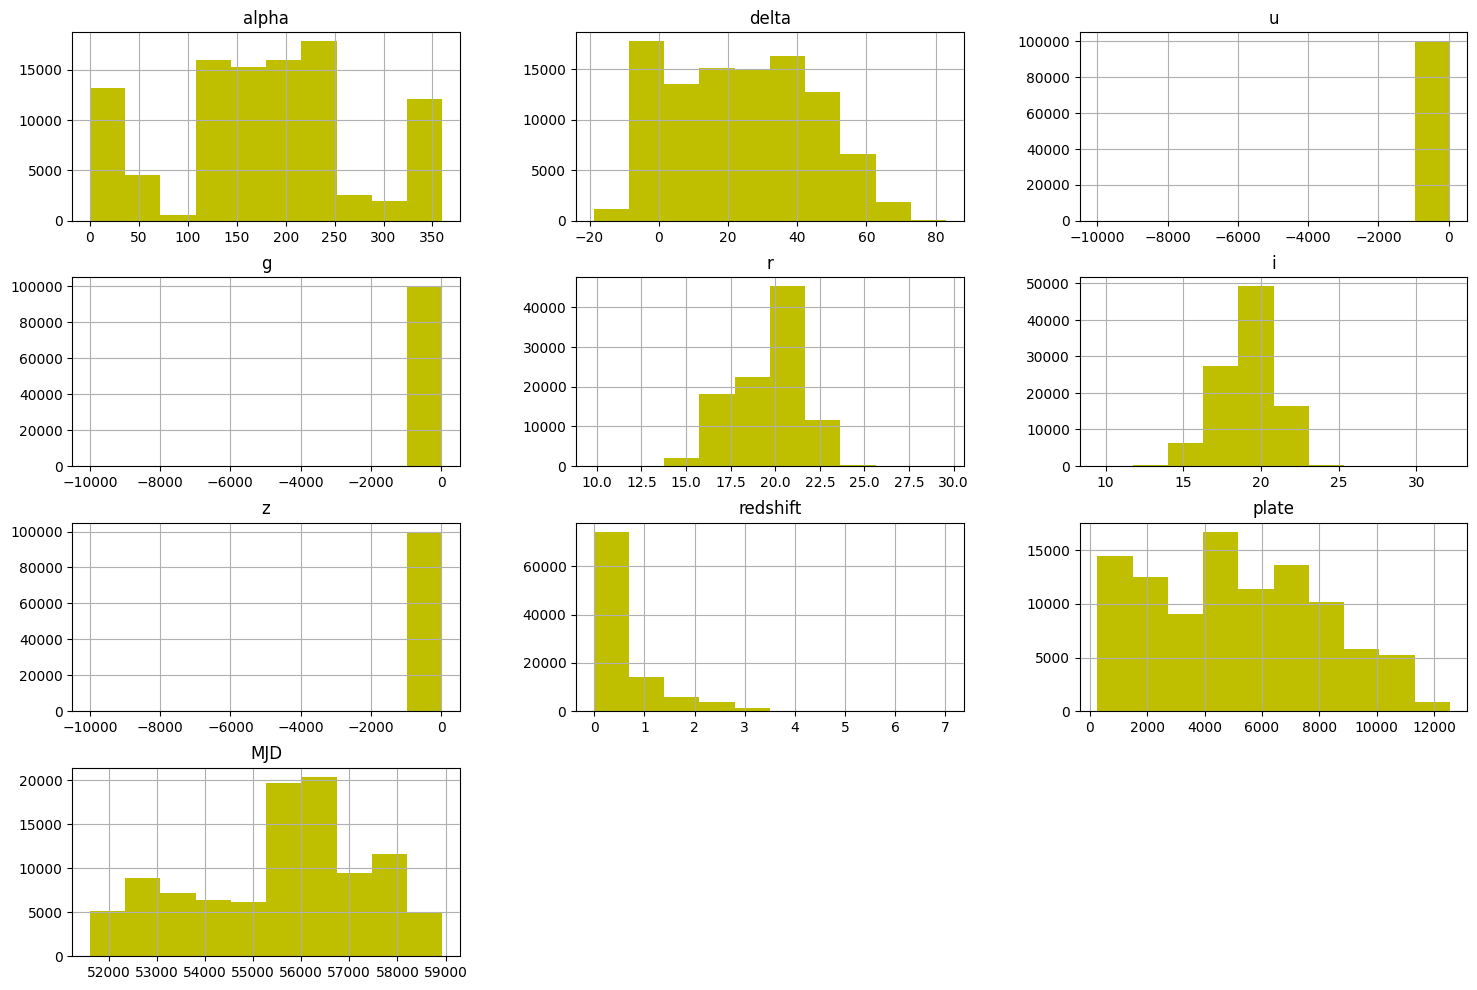

In [11]:
train_df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'MJD']].hist(figsize=(18, 12), color='y');

In [15]:
train_df

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,6121,56187
...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000,9374,57749
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895,7626,56934
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366,2764,54535
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040,6751,56368


In [14]:
sns.countplot(train_df['class'])

ValueError: ignored

In [ ]:
train_df['class'].value_counts()

In [53]:
resolution = 9999


def main(data, path):
    plot(data, "petroMag_u", path)
    plot(data, "h_alpha_flux", path, (-500, 3500))
    plot(data, "lgm_tot_p50", path, (-2000, 1000))
    plot(data, "sfr_tot_p50", path, (-2000, 1000))
    plot(data, "absMagU", path)


def plot(data, yfield, path, yrange=None, use_bins=True, xfield="z"):
    import matplotlib.pyplot as plt, numpy as np, os, scipy.stats as stats

    filepath = path + "/" + yfield + "-" + xfield + ".png"
    print(filepath)
    if yrange is not None:
        data = data[np.logical_and(data[yfield] > yrange[0], data[yfield] < yrange[1])]
    x = data[xfield][
        np.logical_and(np.isfinite(data[xfield]), np.isfinite(data[yfield]))
    ]
    y = data[yfield][
        np.logical_and(np.isfinite(data[xfield]), np.isfinite(data[yfield]))
    ]
    print("\tPlot " + yfield + "-" + xfield)
    plt.xlabel(xfield)
    plt.ylabel(yfield)
    pearson, p_value = stats.pearsonr(x, y)
    print("\tCompute Pearson coefficient", pearson)
    print("\tCompute p-value", p_value)
    plt.title(
        "{}-{}\nPearson coefficient: {:.2f}, p-value {:.2f}".format(
            yfield, xfield, float(pearson), float(p_value)
        )
    )
    plt.scatter(x, y, alpha=0.1)
    os.makedirs(path, exist_ok=True)
    plt.savefig(filepath)
    plt.cla()
    if use_bins and abs(pearson) > 0.5:
        path += "/step2bis/"
        bins = np.linspace(x.min(), x.max(), 6)
        for bin_index in range(len(bins) - 1):
            from .step2 import plot

            print("\tPlot", bins[bin_index], "to", bins[bin_index + 1])
            plot(
                data[
                    np.logical_and(
                        data[xfield] > bins[bin_index],
                        data[xfield] < bins[bin_index + 1],
                    )
                ],
                yfield,
                path,
                filename="{}-{}".format(yfield, bin_index),
                title="{},\n {} in [{},{}[".format(
                    yfield, xfield, bins[bin_index], bins[bin_index + 1]
                ),
            )

In [16]:
X = train_df.drop('class', axis=1)
# 'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2
y = train_df['class'].map({'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2})
y[:10]

0    0
1    0
2    0
3    0
4    0
5    2
6    2
7    0
8    0
9    1
Name: class, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
stdScaler = StandardScaler()

In [19]:
numeric_cols = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'MJD']

X_train = pd.DataFrame(stdScaler.fit_transform(X_train), columns=numeric_cols)
X_test = pd.DataFrame(stdScaler.transform(X_test), columns=numeric_cols)

In [20]:
X_train.head()

,alpha,delta,u,g,r,i,z,redshift,plate,MJD
0,0.785462,-0.259030,0.091714,0.043226,0.611363,0.421915,0.053987,-0.176846,-1.211856,-1.339322
1,-0.046886,2.202909,-0.038609,-0.053446,-1.103159,-1.097398,-0.052464,-0.605736,-1.576673,-2.020132
2,0.202425,1.470150,0.117129,0.042385,0.343835,0.119544,0.006474,-0.005164,0.548486,0.456245
3,0.678154,0.864727,0.084102,0.057178,0.911602,0.712613,0.020430,0.235890,1.147586,1.276539
4,0.127113,-1.340036,0.046857,0.022018,-0.031690,-0.339934,-0.022640,-0.789566,-0.752445,-0.542276


<Axes: >

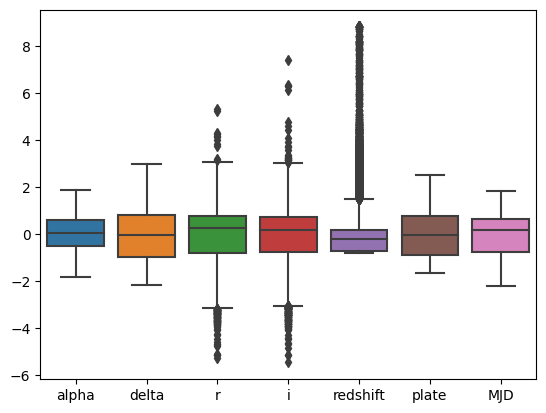

In [21]:
sns.boxplot(data=X_train[['alpha', 'delta', 'r', 'i', 'redshift', 'plate', 'MJD']])

<Axes: >

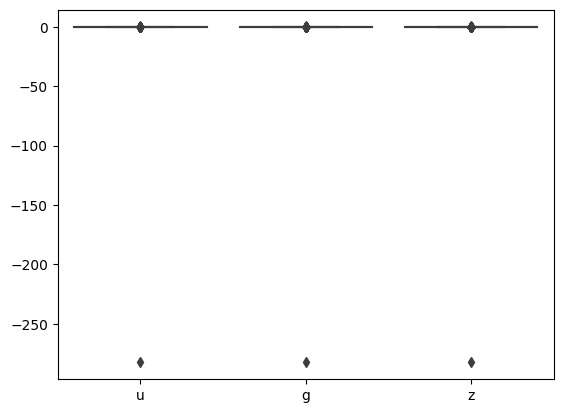

In [22]:
sns.boxplot(data=X_train[['u', 'g', 'z']])

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [25]:
dt = DecisionTreeClassifier(min_samples_leaf=14, random_state=1)

In [26]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=14, random_state=1)

In [27]:
dt.score(X_test, y_test)

0.97725

In [28]:
pred_dt = dt.predict(X_test)

In [29]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11871
           1       1.00      1.00      1.00      4308
           2       0.96      0.93      0.94      3821

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



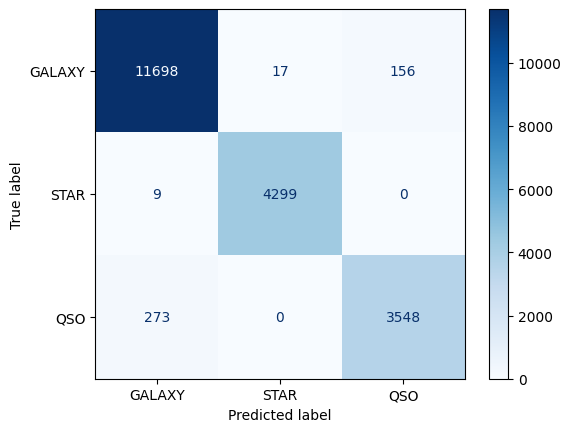

In [30]:
cmdt = confusion_matrix(y_test, pred_dt)
# 'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2
ConfusionMatrixDisplay(confusion_matrix=cmdt, display_labels=['GALAXY', 'STAR', 'QSO']).plot(cmap=plt.cm.Blues);

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf=18, n_estimators=400, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=18, n_estimators=400, random_state=1)

In [32]:
rf.score(X_test, y_test)

0.97935

In [33]:
pred_rf = rf.predict(X_test)

In [34]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11871
           1       0.99      1.00      1.00      4308
           2       0.97      0.94      0.95      3821

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



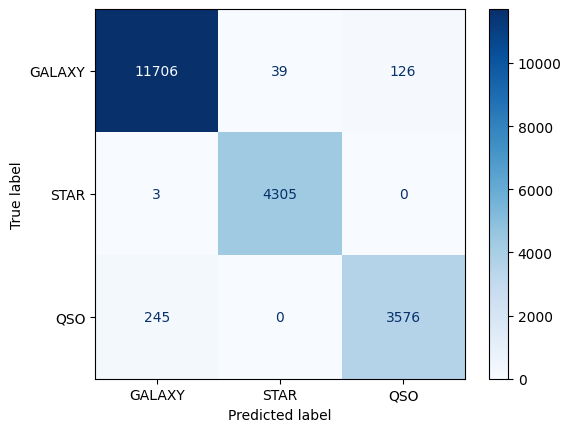

In [35]:
cmrf = confusion_matrix(y_test, pred_rf)
# 'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2
ConfusionMatrixDisplay(confusion_matrix=cmrf, display_labels=['GALAXY', 'STAR', 'QSO']).plot(cmap=plt.cm.Blues);

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
ex = ExtraTreesClassifier(n_estimators=400, min_samples_leaf=18, random_state=1)
ex.fit(X_train, y_train)

ExtraTreesClassifier(min_samples_leaf=18, n_estimators=400, random_state=1)

In [37]:
ex.score(X_test, y_test)

0.9655

In [38]:
pred_ex = ex.predict(X_test)
print(classification_report(y_test, pred_ex))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11871
           1       0.97      0.98      0.97      4308
           2       0.97      0.90      0.94      3821

    accuracy                           0.97     20000
   macro avg       0.97      0.95      0.96     20000
weighted avg       0.97      0.97      0.97     20000



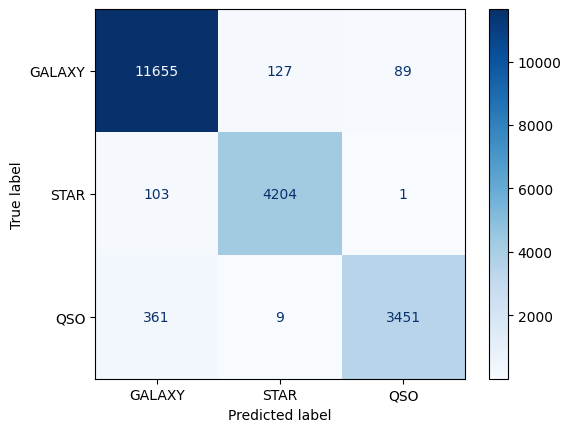

In [39]:
cmex = confusion_matrix(y_test, pred_ex)
# 'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2
ConfusionMatrixDisplay(confusion_matrix=cmex, display_labels=['GALAXY', 'STAR', 'QSO']).plot(cmap=plt.cm.Blues);

In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=400,
                    use_label_encoder=False,
                    random_state=1, objective='multi:softmax',
                    num_class=3,
                    eval_metric = 'mlogloss')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [41]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=400, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

In [42]:
xgb.score(X_test, y_test)

0.98115

In [43]:
pred_xgb = xgb.predict(X_test)

In [44]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11871
           1       1.00      1.00      1.00      4308
           2       0.96      0.94      0.95      3821

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



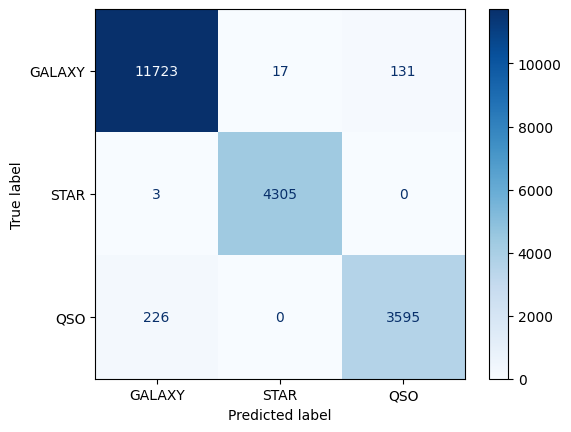

In [45]:
cmxgb = confusion_matrix(y_test, pred_xgb)
# 'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2
ConfusionMatrixDisplay(confusion_matrix=cmxgb, display_labels=['GALAXY', 'STAR', 'QSO']).plot(cmap=plt.cm.Blues);

In [46]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [47]:
ada.score(X_test, y_test)


0.77065

In [48]:
pred_ada = ada.predict(X_test)

In [49]:
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83     11871
           1       0.98      1.00      0.99      4308
           2       0.11      0.03      0.04      3821

    accuracy                           0.77     20000
   macro avg       0.61      0.65      0.62     20000
weighted avg       0.68      0.77      0.71     20000



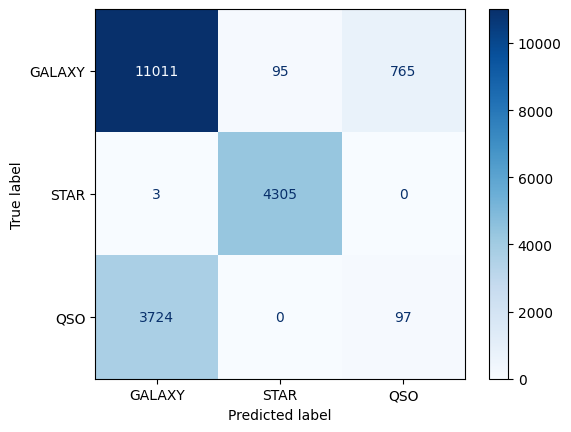

In [50]:
cmada = confusion_matrix(y_test, pred_ada)
# 'GALAXY' : 0, 'STAR' : 1, 'QSO' : 2
ConfusionMatrixDisplay(confusion_matrix=cmada, display_labels=['GALAXY', 'STAR', 'QSO']).plot(cmap=plt.cm.Blues);